# Developing an API for AMGeO Users 

## AMGeO 

AMGeO  is  a  data  science  software  project  funded  by  the  NSF  EarthCube  programaiming to open up the vast amount of geospace data to a broader audience, while also giving users an access to data analysis tools that help gain meaningful insights from this data.

For more information on AMGeO and how to get started, please visit our website: https://amgeo.colorado.edu/

## Authors

In [1]:
Author1 = {
    "name": "Willem Mirkovich",
    "affiliation": "University of Colorado Boulder, Smead Aerospace Engineering Sciences",
    "email": "willemmirkovich@gmail.com"
}
Author2 = {
    "name": "Tomoko Matsuo",
    "affiliation": "University of Colorado Boulder, Smead Aerospace Engineering Sciences",
    "email": "",
    "orcid": "0000-0002-2754-1224" 
}
Author3 = {
    "name": "Liam Kilcommons",
    "affiliation": "University of Colorado Boulder, Smead Aerospace Engineering Sciences",
    "email": "",
    "orcid": "0000-0002-4980-3045"
}

## Purpose

To empower new and existing users of [AMGeO](https://amgeo.colorado.edu/) in pursuit of their research goals, a new API (Application Programming Interface) is being developed. 
It will offer a smoother introduction for new users to the tools provided by AMGeO, and also facilitate efficient workflows for experienced users.

This notebook showcases the new API, and example use cases given differnent levels of experience/tasks to complete.

TODO: different levels explanation

## Technical contributions

This notebook showcases the new API that will be available when using AMGeO.

## Methodology

This API has been designed with the intention of facilitating the ease of use with AMGeO. While AMGeO is highly customizeable and offers researchers an array of tools to get the data they need, there is some necessary post processing to actually use the data generated. 

During the development of the new API, our main target audience has been users who may not have a lot of experience with python, or don't want to have to manually read data from hdf5 files. To make this process easier for such users, tools like [xarray](link) and [numpy](link) are being used to help new users get off the ground running. 

To address these needs, the following features have been added.
- accessibility through notebooks
- high-level data generation jobs (range of dates, list of dates, etc.)
- python friendly data interopablitiy with tools like numpy and xarray
- configuration tools


## Results

The new AMGeO API is currently still in testing, but we currently have a demo (this notebook) and a future workshop to showcase this new tool. Once fully tested, the new API will be available to all users of AMGeO.

## Funding

TODO: NSF Grant here

## Keywords

In [2]:
keywords = ['AMGeO', 'API', 'Data Assimilation', 'Ionoshpheric Electrodynamics', 
            'python'] # TODO

## Citation

TODO: Zenodo citation once done will be put here

## Work in progress

The following items are stil in progress of being developed

- profile settings to save configuration settings
- range of times in between two datetimes
- full metadata access from data generated using API

## Suggested next steps

If you would like to learn more about AMGeO or get a hands on demo with the API presented here, please join us at our workshop in (TODO) by (TODO)

http://cedarweb.vsp.ucar.edu/wiki/index.php/2021_Workshop:AMGeO

## Acknowledgements

### SuperMAG

#### Ground Magnetometer Data

For the ground magnetometer data we gratefully acknowledge: INTERMAGNET, Alan Thomson; CARISMA, PI Ian Mann; CANMOS, Geomagnetism Unit of the Geological Survey of Canada; The S-RAMP Database, PI K. Yumoto and Dr. K. Shiokawa; The SPIDR database; AARI, PI Oleg Troshichev; The MACCS program, PI M. Engebretson; GIMA; MEASURE, UCLA IGPP and Florida Institute of Technology; SAMBA, PI Eftyhia Zesta; 210 Chain, PI K. Yumoto; SAMNET, PI Farideh Honary; IMAGE, PI Liisa Juusola; Finnish Meteorological Institute, PI Liisa Juusola; Sodankylä Geophysical Observatory, PI Tero Raita; UiT the Arctic University of Norway, Tromsø Geophysical Observatory, PI Magnar G. Johnsen; GFZ German Research Centre For Geosciences, PI Jürgen Matzka; Institute of Geophysics, Polish Academy of Sciences, PI Anne Neska and Jan Reda; Polar Geophysical Institute, PI Alexander Yahnin and Yarolav Sakharov; Geological Survey of Sweden, PI Gerhard Schwarz; Swedish Institute of Space Physics, PI Masatoshi Yamauchi; AUTUMN, PI Martin Connors; DTU Space, Thom Edwards and PI Anna Willer; South Pole and McMurdo Magnetometer, PI's Louis J. Lanzarotti and Alan T. Weatherwax; ICESTAR; RAPIDMAG; British Artarctic Survey; McMac, PI Dr. Peter Chi; BGS, PI Dr. Susan Macmillan; Pushkov Institute of Terrestrial Magnetism, Ionosphere and Radio Wave Propagation (IZMIRAN); MFGI, PI B. Heilig; Institute of Geophysics, Polish Academy of Sciences, PI Anne Neska and Jan Reda; University of L’Aquila, PI M. Vellante; BCMT, V. Lesur and A. Chambodut; Data obtained in cooperation with Geoscience Australia, PI Andrew Lewis; AALPIP, co-PIs Bob Clauer and Michael Hartinger; SuperMAG, PI Jesper W. Gjerloev; Data obtained in cooperation with the Australian Bureau of Meteorology, PI Richard Marshall. 

### SuperDARN

‘The authors acknowledge the use of SuperDARN data. SuperDARN is a collection of radars
funded by national scientific funding agencies of Australia, Canada, China, France, Italy, Japan,
Norway, South Africa, United Kingdom and the United States of America.’

# Setup

In [3]:
# AMGeO API
from AMGeO.api import AMGeOApi # TODO: AMGeOApi => name for api class, or Api
from AMGeO.plots import grid_data_contourf

# datetime, date
from datetime import date, datetime

import numpy as np

# matplot lib for intermediate plots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from geospacepy.satplottools import draw_dialplot
from pandas import DatetimeIndex


# scikit learn for pca
from sklearn.decomposition import PCA

Traceback (most recent call last):
  File "/Users/willemmirkovich/AMGeO/AMGeO/src/nasaomnireader/nasaomnireader/__init__.py", line 5, in <module>
    from nasaomnireader.omnireader_config import config
ModuleNotFoundError: No module named 'nasaomnireader.omnireader_config'

Solar wind data files will be saved to /Users/willemmirkovich/Library/Application Support/nasaomnireader
Traceback (most recent call last):
  File "/Users/willemmirkovich/AMGeO/AMGeO/src/nasaomnireader/nasaomnireader/omnireader.py", line 12, in <module>
    from spacepy import pycdf
ModuleNotFoundError: No module named 'spacepy'


------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



In [4]:
# TODO: local imports for file config

# Parameter definitions

In [5]:
'''
This is the main api instance, used to create controllers to load/generate data
and set configurations
'''
api = AMGeOApi()

'''
A controller instance is used to define the kind of data you wish to interact with amgeo
Default settings are used on getting a controller, and is recommended for first time users
'''
controller = api.get_controller()

'''
We can set the directories we wish to use for saving our AMGeO data
'''
# novice setup
default_dir = './default_amgeo_out'

# intermediate setup
intermediate_dir = './intermediate_amgeo_out'

# expert setup
expert_dir = './expert_amgeo_out'

'''
For this notebook, we will be collecting data from the norther hemisphere
'''
hemisphere = 'N'

'''
To generate AMGeO data, you must register with AMGeO and create accounts with our data 
providers. To set these values and get instructions, refer to the following method on our api
'''
api.set_configuration()

Please register with AMGeO here: https://amgeo.colorado.edu/home
Once registered, go to your account and get your API key
Enter your AMGeO API Key: Ijhtd1VsRytKQXVkZm5QNzRDK3ErdGdKcXNOU2xreWQyUlhPU243VGtpYlhxM09qSlZSNVR6NWd5RXZlS0UzRXFHNlA2bnZDMFhjRkRXc01vdDdKMTQxU1E0dGhLQlFMNTZpa0VwZzF4bXE1SWt2eXlYTTNEeHdOSCtyVURoUmN0Ig.E38YmQ.6QtRbf81GSFWoyd6QynjDiKlTag
Please register with SuperMAG here: https://supermag.jhuapl.edu/
Enter your SuperMAG username: wjmirk
Please register with SuperMAG here: http://vt.superdarn.org/tiki-index.php
Enter your Ampere username: wjmirk


# Data import

## Novice

Generating data with AMGeO has become much easier, and can now be done exlusively in python/a notebook!

In [6]:
# this will usually be set to the standard amgeo_output directory, but for this notebook we will set up another 
# default
api.set_output_dir(default_dir)
api.get_output_dir()

'./default_amgeo_out'

In [7]:
# specify the date time desired
dt = datetime(2016, 5, 6, 12, 30, 0)

# generate data for the following single datetime
controller.generate(dt, hemisphere)

Running AMGeO on 2016-5-6 12:30:0 N



2016-5-6 12:30:0 N complete


## Intermediate

Complex jobs can also be run with a list of different datetimes being one option

In [8]:
api.set_output_dir(intermediate_dir)
api.get_output_dir()

'./intermediate_amgeo_out'

In [9]:
# run on list of datetimes
datetimes = [
    datetime(2013, 1, 1, 0, 1, 0),
    datetime(2013, 1, 1, 1, 1, 0),
    datetime(2013, 1, 1, 2, 1, 0),
    datetime(2013, 1, 1, 3, 1, 0),
    datetime(2013, 1, 1, 4, 1, 0),
    datetime(2013, 1, 1, 5, 1, 0),
]

# generate data for each specific datetime provided in list
controller.generate(datetimes, hemisphere)

Running day 1 of 6
Running AMGeO on 2013-1-1 0:1:0 N



2013-1-1 0:1:0 N complete
Running day 2 of 6
Running AMGeO on 2013-1-1 1:1:0 N



2013-1-1 1:1:0 N complete
Running day 3 of 6
Running AMGeO on 2013-1-1 2:1:0 N



2013-1-1 2:1:0 N complete
Running day 4 of 6
Running AMGeO on 2013-1-1 3:1:0 N



2013-1-1 3:1:0 N complete
Running day 5 of 6
Running AMGeO on 2013-1-1 4:1:0 N



2013-1-1 4:1:0 N complete
Running day 6 of 6
Running AMGeO on 2013-1-1 5:1:0 N



2013-1-1 5:1:0 N complete


## Expert

It is still possible (although time consuming) to run an entire days worth of AMGeO as well

In [10]:
api.set_output_dir(expert_dir)
api.get_output_dir()

'./expert_amgeo_out'

In [11]:
d = date(2014, 3, 3)

controller.generate(d, hemisphere)

Running AMGeO on 2014-3-3 N


KeyboardInterrupt: 

# Data processing and analysis

## Novice

Next, lets load the data from our default directory that we have output in

In [12]:
# set the outoput dir
api.set_output_dir(default_dir)

# see what data is available 
controller.browse()

['20160506N']

Since we have '20160506N' data available, we can load all the specific data available in this day into an xarray dataset

In [13]:
# get the day 
date = controller.browse()[0]

# get xarray dataset
ds = controller.load(date)
ds

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 2016-05-06T12:30:00
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.02788 -0.02519 ... -3.463e-06
    E_th            (time, lat, lon) float64 -0.02219 -0.02662 ... 0.0003566
    cond_hall       (time, lat, lon) float64 4.386 4.398 4.414 ... 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 1.742e+04 1.826e+04 ... -528.6
    int_joule_heat  (time) float64 67.91
    joule_heat      (time, lat, lon) float64 5.08 5.372 ... 0.0004656 0.0005087
    v_ph            (time, lat, lon) float64 -377.6 -453.0 ... 0.3025 7.302
    v_th            (time, lat, lon) float64 474.5 428.5 364.6 ... 6.979 0.07091
Attributes:
    description:  AMGeO v2 beta data
    version:      v2_beta

The xarray dataset has all of the different types of data we might be interested, and an readily defined dimension structure. Below are some examples of parsing this data.

In [14]:
# get the array associated with a specific type of data, such as Hall Conductance
ds['cond_hall']

<xarray.DataArray 'cond_hall' (time: 1, lat: 24, lon: 37)>
array([[[ 4.3855638 ,  4.39846505,  4.41412272,  4.44755836,
          4.49178796,  4.52645655,  4.58475024,  4.62682582,
          4.69292467,  4.76027217,  4.80453836,  4.86801809,
          4.92573561,  4.95985092,  5.00295017,  5.03485042,
          5.04924656,  5.05990712,  5.05955326,  5.0478763 ,
          5.02331953,  5.00028048,  4.9567726 ,  4.90412377,
          4.86497519,  4.80190214,  4.73582182,  4.69136511,
          4.62598239,  4.56438618,  4.52659652,  4.47642481,
          4.44814698,  4.41468769,  4.39309375,  4.38572828,
          4.3855638 ],
        [ 4.        ,  4.        ,  4.01382393,  4.09030685,
          4.19226447,  4.2725946 ,  4.40828152,  4.50661281,
          4.66163598,  4.8201581 ,  4.9246047 ,  5.07464907,
          5.21123475,  5.29197124,  5.39385019,  5.46897535,
          5.50271454,  5.52714611,  5.51949903,  5.49682457,
          5.43765643,  5.38266872,  5.27945453,  5.15530968,
          5.06341294,  4.91596645,  4.76216473,  4.65901402,
          4.50768464,  4.36541179,  4.27819803,  4.16237675,
          4.09699955,  4.01937711,  4.        ,  4.        ,
          4.        ],
...
        [ 4.        ,  4.        ,  4.        ,  4.        ,
          4.        ,  4.        ,  4.        ,  4.        ,
          4.41560099,  7.04357508,  8.80167261, 11.2927418 ,
         13.41783465, 14.53016433, 15.72684513, 16.41038301,
         16.62870673, 16.66574883, 16.51856506, 16.04691279,
         15.26118785, 14.55548048, 13.22281078, 11.57994231,
         10.33615106,  8.3064257 ,  6.23423669,  4.88102879,
          4.        ,  4.        ,  4.        ,  4.        ,
          4.        ,  4.        ,  4.        ,  4.        ,
          4.        ],
        [ 4.        ,  4.        ,  4.        ,  4.        ,
          4.        ,  4.        ,  4.        ,  4.        ,
          4.38800914,  7.21840345,  9.11264027, 11.7900015 ,
         14.05581948, 15.2256946 , 16.4570332 , 17.13223373,
         17.33490847, 17.34872363, 17.18925273, 16.70029247,
         15.88920252, 15.15715281, 13.76522971, 12.03608162,
         10.72049545,  8.56626198,  6.36266237,  4.92319581,
          4.        ,  4.        ,  4.        ,  4.        ,
          4.        ,  4.        ,  4.        ,  4.        ,
          4.        ]]])
Coordinates:
  * time     (time) datetime64[ns] 2016-05-06T12:30:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    description:  cond_hall
    longname:     Ovation Pyme Hall Conductance
    shortname:    cond_hall
    units:        mho

In [15]:
# get the date/time information associated with an index
# [data_type][time_index]
ds['cond_hall'][0].time

<xarray.DataArray 'time' ()>
array('2016-05-06T12:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2016-05-06T12:30:00

In [16]:
# get the latitude/longitude of a specific data entry
lat, lon = int(ds['cond_hall'][0][12][20].lat), int(ds['cond_hall'][0][12][20].lon)
print('latitude: %s, longitude: %s' % (lat, lon))

latitude: 68, longitude: 200


In [17]:
# get the epot data associated with a specific datetime
epot = ds['epot'].sel(time=dt)
epot

<xarray.DataArray 'epot' (lat: 24, lon: 37)>
array([[ 1.74189638e+04,  1.82570141e+04,  1.89926476e+04,
         1.95995413e+04,  2.00656769e+04,  2.03949442e+04,
         2.06073716e+04,  2.07359382e+04,  2.08189772e+04,
         2.08897555e+04,  2.09668621e+04,  2.10490279e+04,
         2.11160401e+04,  2.11348271e+04,  2.10680691e+04,
         2.08824781e+04,  2.05548431e+04,  2.00751991e+04,
         1.94474672e+04,  1.86884292e+04,  1.78259276e+04,
         1.68968605e+04,  1.59451331e+04,  1.50194052e+04,
         1.41702657e+04,  1.34464715e+04,  1.28903856e+04,
         1.25336000e+04,  1.23941875e+04,  1.24764258e+04,
         1.27724655e+04,  1.32643564e+04,  1.39250519e+04,
         1.47183833e+04,  1.55994533e+04,  1.65171313e+04,
         1.74189638e+04],
       [ 1.74681962e+04,  1.91728042e+04,  2.06379288e+04,
         2.17999476e+04,  2.26133846e+04,  2.30665900e+04,
         2.32023767e+04,  2.31216941e+04,  2.29587886e+04,
         2.28375893e+04,  2.28310840e+04,  2.29417078e+04,
         2.31081133e+04,  2.32310603e+04,  2.32050156e+04,
         2.29442073e+04,  2.23975215e+04,  2.15505782e+04,
         2.04170885e+04,  1.90270282e+04,  1.74207202e+04,
...
        -7.17829888e+02, -7.46662819e+02, -7.26067225e+02,
        -6.77316209e+02, -6.62009651e+02, -6.32952073e+02,
        -6.51647017e+02, -7.35721552e+02, -7.56622182e+02,
        -7.78130816e+02, -8.23066720e+02, -7.69260556e+02,
        -7.61854027e+02, -8.21125064e+02, -7.52815137e+02,
        -7.84851881e+02, -9.30309318e+02, -7.24906994e+02,
        -4.63372996e+02],
       [-5.28564314e+02, -6.41488170e+02, -7.23970700e+02,
        -6.00231247e+02, -5.74987296e+02, -6.43717791e+02,
        -6.41852962e+02, -6.71061656e+02, -7.26622031e+02,
        -7.25533313e+02, -7.40906344e+02, -7.57842961e+02,
        -7.26295664e+02, -7.11957077e+02, -7.03951644e+02,
        -6.77601342e+02, -6.86409036e+02, -7.09437418e+02,
        -7.21696848e+02, -7.38323064e+02, -7.22200301e+02,
        -6.86811881e+02, -6.70672060e+02, -6.53288425e+02,
        -6.72741050e+02, -7.33044414e+02, -7.54028582e+02,
        -7.70669168e+02, -7.95600141e+02, -7.62243410e+02,
        -7.58075776e+02, -7.90957932e+02, -7.49993024e+02,
        -7.72520748e+02, -8.50474565e+02, -7.02489908e+02,
        -5.28564314e+02]])
Coordinates:
    time     datetime64[ns] 2016-05-06T12:30:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    description:  epot
    longname:     Electric Potential
    shortname:    epot
    units:        V

This data can be plugged into plots provided by AMGeO to generate a quick plot as well

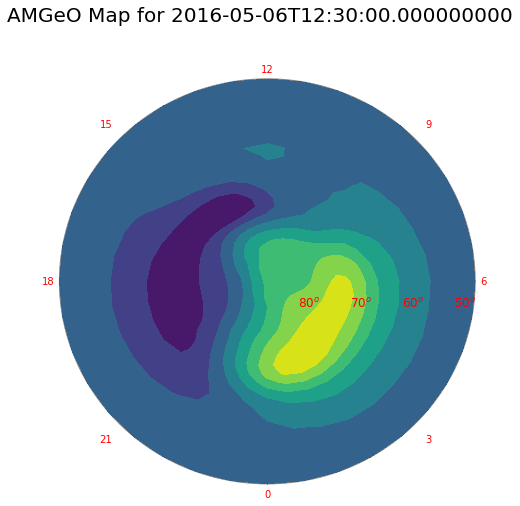

In [18]:
# plot data from epot
fig, ax = plt.subplots(figsize=(8, 8))
grid_data_contourf(ax, epot.values)
draw_dialplot(ax)

# TODO: title name 
t = epot.time.values
fig.suptitle('AMGeO Map for {}'.format(t), fontsize=20)
None

## Intermediate

For an intermediate level python programmer, one might want to use custom functions, other libraries to display the data. Our use of Xarray makes this really simple

In this example, we will be collecting the cross polar cap potential from an array of different times and plotting them on a time series

In [19]:
api.set_output_dir(intermediate_dir)

controller.browse()

['20130101N']

In [20]:
# first, load data set
ds = controller.load(controller.browse()[0])
ds

<xarray.Dataset>
Dimensions:         (lat: 24, lon: 37, time: 6)
Coordinates:
  * time            (time) datetime64[ns] 2013-01-01T00:01:00 ... 2013-01-01T...
  * lat             (lat) float64 88.33 86.67 85.0 83.33 ... 53.33 51.67 50.0
  * lon             (lon) float64 0.0 10.0 20.0 30.0 ... 330.0 340.0 350.0 360.0
Data variables:
    E_ph            (time, lat, lon) float64 -0.001572 -0.002463 ... -1.788e-06
    E_th            (time, lat, lon) float64 0.01641 0.01577 ... -0.0003411
    cond_hall       (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    cond_ped        (time, lat, lon) float64 4.0 4.0 4.0 4.0 ... 4.0 4.0 4.0 4.0
    epot            (time, lat, lon) float64 -4.649e+03 -4.564e+03 ... 411.0
    int_joule_heat  (time) float64 10.4 6.848 8.366 9.427 8.125 8.19
    joule_heat      (time, lat, lon) float64 1.087 1.019 ... 0.0003831 0.0004655
    v_ph            (time, lat, lon) float64 279.2 268.3 ... -0.7014 -6.985
    v_th            (time, lat, lon) float64 26.75 41.91 ... -6.298 0.03661
Attributes:
    description:  AMGeO v2 beta data
    version:      v2_beta

In [21]:
# get the electric potentials
epots = ds['epot']
epots

<xarray.DataArray 'epot' (time: 6, lat: 24, lon: 37)>
array([[[-4648.63939379, -4563.64603576, -4437.49950195, ...,
         -4738.64304376, -4700.68573456, -4648.63939379],
        [-4812.61820565, -4626.2140514 , -4308.24203548, ...,
         -4921.44340152, -4890.08073038, -4812.61820565],
        [-3093.50762834, -2912.40342239, -2476.29386569, ...,
         -2975.20403466, -3065.30915742, -3093.50762834],
        ...,
        [  681.78760904,   943.07116679,  1189.12374515, ...,
          1188.52795752,   971.34870197,   681.78760904],
        [  329.47867573,   504.10204271,   662.2960162 , ...,
           662.33789625,   524.11577811,   329.47867573],
        [  386.22043786,   501.47372512,   617.66601697, ...,
           622.4073778 ,   517.94866873,   386.22043786]],

       [[-3784.61755406, -3670.45260802, -3581.83798289, ...,
         -4085.18026702, -3922.1515466 , -3784.61755406],
        [-4121.23634116, -3852.80095904, -3570.78186634, ...,
         -4651.75434544, -4378.20945311, -4121.23634116],
        [-2988.08468359, -2636.5151798 , -2200.08515088, ...,
         -3564.95283658, -3266.78248594, -2988.08468359],
...
        [  762.90253973,  1105.70234687,  1420.54515373, ...,
          1408.22404126,  1098.4842015 ,   762.90253973],
        [  353.12221939,   585.2888256 ,   790.33986418, ...,
           776.99571718,   576.87694758,   353.12221939],
        [  431.17708432,   585.78996984,   734.92178395, ...,
           726.08219327,   580.14915265,   431.17708432]],

       [[-2307.27375417, -2181.57012863, -2154.43102749, ...,
         -2908.29460896, -2546.85729017, -2307.27375417],
        [-3064.99563292, -2822.89924465, -2712.94403307, ...,
         -4121.69227982, -3484.71089414, -3064.99563292],
        [-2254.2437934 , -1934.68190274, -1753.42663737, ...,
         -3694.2643228 , -2803.82776511, -2254.2437934 ],
        ...,
        [  729.80223172,  1059.45642139,  1364.63302624, ...,
          1355.89620906,  1055.49159356,   729.80223172],
        [  334.4620551 ,   557.56089464,   756.46406607, ...,
           746.671855  ,   551.94825167,   334.4620551 ],
        [  411.03693794,   559.93350324,   704.80987347, ...,
           697.92197874,   555.69519568,   411.03693794]]])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01T00:01:00 ... 2013-01-01T05:01:00
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    description:  epot
    longname:     Electric Potential
    shortname:    epot
    units:        V

In [22]:
# write a function to get the cross polar cap potential from a grid at time x
def get_potential_drop(da):
    max_v = -np.infty
    min_v = np.infty
    for i in range(len(da)):
        for j in range(len(da[i])):
            if da[i][j] < min_v:
                min_v = da[i][j]
            if da[i][j] > max_v:
                max_v = da[i][j]
    return max_v - min_v

vs = []
for i in range(len(epots)):
    vs.append(get_potential_drop(epots[i]))
    
vs

[<xarray.DataArray 'epot' ()>
 array(24448.82984066)
 Coordinates:
     time     datetime64[ns] 2013-01-01T00:01:00,
 <xarray.DataArray 'epot' ()>
 array(17516.57777353)
 Coordinates:
     time     datetime64[ns] 2013-01-01T01:01:00,
 <xarray.DataArray 'epot' ()>
 array(24931.2866056)
 Coordinates:
     time     datetime64[ns] 2013-01-01T02:01:00,
 <xarray.DataArray 'epot' ()>
 array(23674.93317291)
 Coordinates:
     time     datetime64[ns] 2013-01-01T03:01:00,
 <xarray.DataArray 'epot' ()>
 array(19536.5497173)
 Coordinates:
     time     datetime64[ns] 2013-01-01T04:01:00,
 <xarray.DataArray 'epot' ()>
 array(20597.39864675)
 Coordinates:
     time     datetime64[ns] 2013-01-01T05:01:00]

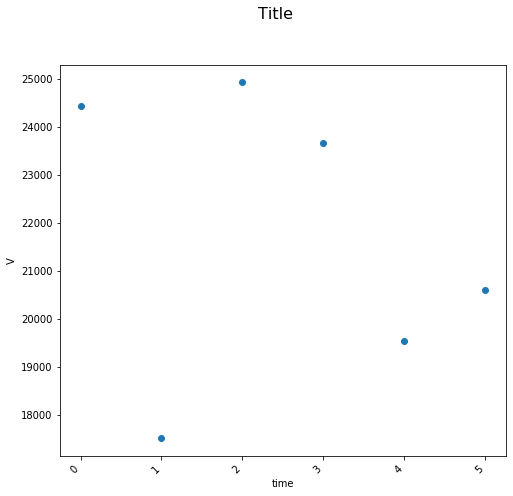

In [23]:
# plot the values over a time series
fig, ax = plt.subplots(figsize=(8, 8))
fig.autofmt_xdate()
# TODO: fix formatting here
# ax.scatter([v.time.values for v in vs], [int(v) for v in vs])
ax.scatter([0, 1, 2, 3, 4, 5], [int(v) for v in vs])

ax.set_ylabel(epots.units)
ax.set_xlabel('time')
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d %H:%M:%S"))
plt.xticks(rotation=45)

fig.suptitle('Title', fontsize=16)
None

## Expert

While the previous two examples demonstrate the ease of use provided by the new API, the API was also developed with expert users in mind to provide for more effecient workflows when using AMGeO.

To display how an expert user might use AMGeO, this example walks through how one might complete Principal Component Analysis with scikit learn with AMGeO. 

In [24]:
def polar2dial(ax):
    """
    Turns a matplotlib axes polar plot into a dial plot
    """
    #Rotate the plot so that noon is at the top and midnight
    #is at the bottom, and fix the labels so radial direction
    #is latitude and azimuthal direction is local time in hours
    ax.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.,40.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax.set_rgrids(r_label_values,labels=r_labels)

'''
Plots the potential over a dial plot
'''
def plot_potential(lats, lons, epot):
    f = plt.figure()
    ax = f.add_subplot(111,projection='polar')
    polar2dial(ax)
    r = np.radians(90.-lats)
    th = np.radians(lons)
    maxpot = np.nanpercentile(np.abs(epot),95)
    mappable = ax.pcolor(th,r,epot,cmap='RdBu_r',vmin=-maxpot,vmax=maxpot)
    return f,ax

In [25]:
api.set_output_dir(expert_dir)

dates = controller.browse()
dates

['20140303N']

In [26]:
# load the data for PCA
ds = controller.load(dates[0])
epots = ds['epot']
epots 
# TODO: here, only get subsection of data using a where

<xarray.DataArray 'epot' (time: 22, lat: 24, lon: 37)>
array([[[ -1499.00534396,  -1169.75322695,   -901.42162902, ...,
          -2292.43357419,  -1875.27316188,  -1499.00534396],
        [ -2126.2611558 ,  -1463.08508008,   -796.17058727, ...,
          -3417.53049624,  -2767.64168667,  -2126.2611558 ],
        [ -1678.10312372,   -830.51697444,    161.40364054, ...,
          -3006.6976535 ,  -2364.15490887,  -1678.10312372],
        ...,
        [   736.68017986,   1085.26481212,   1388.29792613, ...,
           1375.23451961,   1054.66448559,    736.68017986],
        [   318.12890671,    554.00235201,    753.17504126, ...,
            741.75801537,    531.94304168,    318.12890671],
        [   399.01174613,    554.09115954,    698.12405431, ...,
            696.01606119,    542.97536135,    399.01174613]],

       [[ -2216.46063689,  -1743.85555775,  -1322.47098272, ...,
          -3228.43773536,  -2716.1314735 ,  -2216.46063689],
        [ -2716.75669603,  -1805.41791224,   -880.69684028, ...,
          -4386.63772601,  -3573.46432343,  -2716.75669603],
        [ -2029.35864926,   -824.81250776,    525.16292308, ...,
          -3912.71109751,  -3030.84095207,  -2029.35864926],
...
        [   804.52831625,   1199.83941913,   1542.55775303, ...,
           1544.32711079,   1181.34850316,    804.52831625],
        [   341.70145245,    604.78872927,    823.10993871, ...,
            835.92000697,    597.34096587,    341.70145245],
        [   452.56502722,    627.25616359,    786.06244469, ...,
            793.91428794,    621.96904883,    452.56502722]],

       [[ -8542.18423699,  -7971.03780509,  -7349.76527775, ...,
          -9373.51367581,  -9019.77915092,  -8542.18423699],
        [-10485.8137309 ,  -9173.21923824,  -7732.7354937 , ...,
         -12319.17624511, -11555.34392852, -10485.8137309 ],
        [ -9769.77086439,  -7618.11112892,  -5289.30250436, ...,
         -12701.13845714, -11502.65124905,  -9769.77086439],
        ...,
        [   823.99635701,   1239.08807033,   1621.88901317, ...,
           1590.07259309,   1218.98054082,    823.99635701],
        [   345.85329372,    623.57946093,    871.98749642, ...,
            859.03099458,    614.57355961,    345.85329372],
        [   461.49746136,    645.57987431,    825.25546965, ...,
            818.03756299,    640.72252779,    461.49746136]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-03-03T00:02:30 ... 2014-03-03T01:47:30
  * lat      (lat) float64 88.33 86.67 85.0 83.33 ... 55.0 53.33 51.67 50.0
  * lon      (lon) float64 0.0 10.0 20.0 30.0 40.0 ... 330.0 340.0 350.0 360.0
Attributes:
    description:  epot
    longname:     Electric Potential
    shortname:    epot
    units:        V

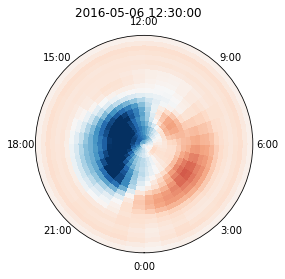

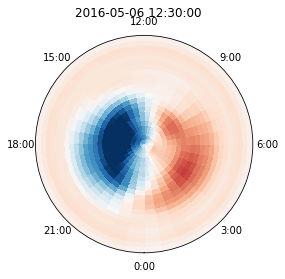

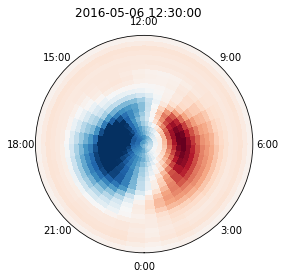

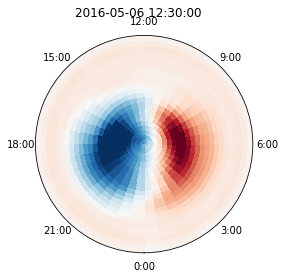

In [27]:
# plot some of the potentials from the data
fs,axs = {},{}
for epot in epots[0:4]:
    keystr = '{}{}'.format(dt.strftime('%Y%m%d_%H%M%S'),hemisphere)
    fs[keystr],axs[keystr] = plot_potential(epot.lat.values, epot.lon.values, epot.values)
    fs[keystr].suptitle(dt)

In [28]:
# flatten the data for scikit learn PCA
epots_flat = [el.values.flatten() for el in epots]

In [29]:
# plug the data in 
X = np.row_stack(epots_flat)
n_pcs = 4
pca = PCA(n_components=n_pcs)
pca.fit(X)
variance_ratio = pca.explained_variance_ratio_
X1 = pca.transform(X)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


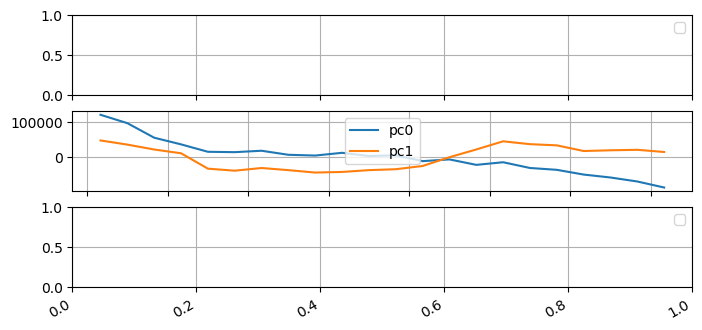

In [31]:
# TODO: do we want this?

f = plt.figure(figsize=(8,4),dpi=100)
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)

# dts = jdarr2datetime(np.array(jds))
# dts = [0, 1, 2, 3] # get actual datetimes
dts = epots.time
# ax1.plot(dts,cpcps,label='cpcp')
for i_pc in range(2):
    ax2.plot(dts,X1[:,i_pc],label='pc{}'.format(i_pc))
# ax3.plot(dts,bys,label='by')
# ax3.plot(dts,bzs,label='bz')
for ax in [ax1,ax2,ax3]:
    ax.legend()
    ax.grid(True)
f.autofmt_xdate()

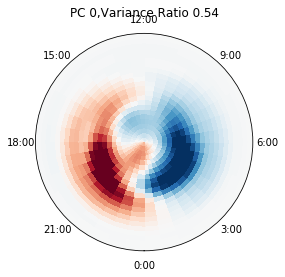

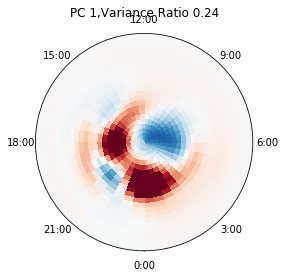

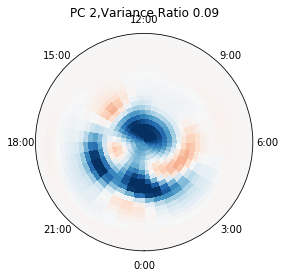

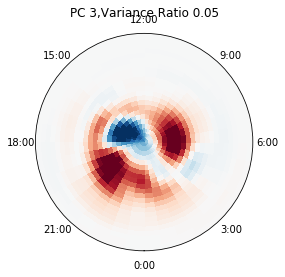

In [32]:
# plot principal components
fs,axs={},{}
lats, lons = epots[0].lat.values, epots[0].lon.values
for i in range(n_pcs):
    pcpot = pca.components_[i].reshape((len(lats), len(lons)))
    fs[i],axs[i]=plot_potential(lats,lons,pcpot)
    axs[i].set_title('PC {},Variance Ratio {:.02f}'.format(i,variance_ratio[i]))
    plt.show()

One of the nice features available with xarray datasets/arrays is the metadata that can be attached. This can allow for easily grabbing the version of AMGeO's software you are using, or other metadata we plan to add in the future 

In [33]:
# print version number 
print(ds.version)

v2_beta


## Summary

These examples showcase the streamlined process for researchers to start using AMGeO, from start to finish. Whether you want to stay in a notebook or incorporate AMGeO into a python project, the functionality provided with this new API seeks to provide for any workflow. TODO: expand

# References

AMGeO white paper
supermag/superdarn

1. xarray https://zenodo.org/record/4741049
2. scikit learn https://zenodo.org/record/4725836
3. matplotlib https://zenodo.org/record/4743323
4. numpy https://numpy.org/citing-numpy/